# Interpolation - Practical Lesson 3

## Linear interpolation

Interpolation is a method of constructing new points within the range of a discrete set of known data points. 

It may happen to have few data points, obtained by sampling or experimenting. 
These points represent the values of a function $f(x)$, where $x$ is an independent variable (e.g. in recording a trip: distances at certain times, $d = f(t)$). 
It is often required to estimate the value of that function for an intermediate value of the independent variable (e.g. in our previous example what is the distance $d$ at a new time $t$ ?).

Let's exercise on linear interpolation with a couple of examples. 

#### Example 1
Assume you are going on holidays by car and that luckily there isn't much traffic so that you can drive at constant speed (which gives a linear relation between travelled space and time i.e. $s = v \cdot t$, which means that if you plot the distances $s$ as a function of the time $t$ you get a line with slope $v$).
Given two samples of the car travelled distance $s_1$ and $s_2$ taken at two different times $t_1$ and $t_2$ you can linearly interpolate to find your position at different times using the following relations:

$$w = \frac{t - t_1}{t_2 - t_1}$$ 
($t$ generic time at which we want to know the distance $s$)

$$s = (1 - w)\cdot s_1 + w \cdot s_2$$

***Derivation***
The equation of a line for two points $(t_1, s_1)$ and $(t_2, s_2)$ can be written as:

$$\frac{t - t_1}{t_2 - t_1} = \frac{s - s_1}{s_2 - s_1}$$

Setting $w = \frac{t - t_1}{t_2 - t_1}$ and solving for $s$ we find the desired solution:

$$w = \frac{s - s_1}{s_2 - s_1} \Rightarrow (s_2 - s_1)\cdot w = s - s_1 \Rightarrow ...$$

Back to our example, if $s_1 = 25.75~\mathrm{km}\;(@t_1 = 15~\mathrm{min})$ and $s_2 = 171.7~\mathrm{km}\;(@t_2 = 100~\mathrm{min})$ let's compute:

In [1]:
# let's find distance travelled in 1 hour (interpolation)

s_1 = 25.75 # distance in km
t_1 = 15    # elapsed time in minutes
s_2 = 171.7
t_2 = 100

t = 60

w = (t - t_1)/(t_2 - t_1)
s = (1 - w)*s_1 + w*s_2

print ("{:.1f} km".format(s))

103.0 km


If we believe the relation between our variable stays the same, we can use the same formula to extrapolate values outside our initial sample.

For example if we keep the same constant velocity in our trip we could check:

In [2]:
# distance travelled in a 3 hour trip (extrapolation)

s_1 = 25.75 # distance in km
t_1 = 15    # elapsed time in minutes
s_2 = 171.7
t_2 = 100

t = 180

w = (t - t_1)/(t_2 - t_1)
s = (1 - w)*s_1 + w*s_2

print ("{:.1f} km".format(s))

309.1 km


### Log-linear interpolation

When the variable we would like to interpolate has an exponential relation with the unknown we can fall back to the previous case by applying the logarithm. In this case the previous formulas apply again except that at the end we have to exponentiate to get back the original variable:

$$p = \mathrm{exp}(c \cdot h)$$

$$s = \mathrm{log}(p) = \mathrm{log}(\mathrm{exp}(c \cdot h)) = c \cdot h$$

$$w = \frac{h - h_1}{h_2 - h_1}$$

$$s = (1 - w)\cdot s_1 + w \cdot s_2\;\;(\mathrm{remember \;now }\;s = \mathrm{log}(p))$$

$$p = \mathrm{exp}(s)$$

Let's see a practical example.<br>

#### Example 2

Atmospheric pressure decreases with the altitude (i.e. the highest I flight the lower is the pressure) following an exponential law:

$$p = p_0\cdot e^{-\alpha h}$$

where

* $h$ is the altitude
* $p_0$ is the pressure at sea level
* $\alpha$ is a constant

Taking the logarithm of each side of the equation I get a linear relation which can be interpolated as before:

$$\tilde{s} = \mathrm{log}(p) = \mathrm{log}(p_0\cdot e^{-\alpha h})\propto - \alpha \cdot h$$

Now assume that we have measured $p_1 = 90~\mathrm{kPa}\;(h_1 = 1000~\mathrm{m})$ and $p_2 = 40~\mathrm{kPa}\;(h_1 = 7000~\mathrm{m})$ what will be the atmospheric pressure on top of the Mont Blanc ($4812~\mathrm{m}$) ? and on top of Mount Everest ($8848~\mathrm{m}$) ? 

In [3]:
# pressure on top of the Mont Blanc (interpolation)
from math import log, exp

# first we take the logarithm of our measurements to use the linear 
# relation to interpolate
h_1 = 1000 # height in meters
s_1 = log(90) # logarithm of the pressure at heigth h1
h_2 = 7000 # height in meters
s_2 = log(40) # logarithm of the pressure at heigth h2

h = 4812

w = (h - h_1)/(h_2 - h_1)
s = (1 - w)*s_1 + w*s_2

print ("{:.1f} kPa".format(exp(s)))

53.8 kPa


In [4]:
# pressure on top of the Mount Everest (extrapolation)
from math import log, exp

# first we take the logarithm of our measurements to use the linear 
# relation to interpolate
h_1 = 1000 # height in meters
s_1 = log(90) # logarithm of the pressure at heigth h1
h_2 = 7000 # height in meters
s_2 = log(40) # logarithm of the pressure at heigth h2

h = 8848

w = (h - h_1)/(h_2 - h_1)
s = (1 - w)*s_1 + w*s_2

print ("{:.1f} kPa".format(exp(s)))

31.2 kPa


![Atmospheric pressure versus altitude (wikipedia). Green points represent our measurements, red points represent interpolation/extrapolation.](Atmospheric_Pressure_vs._Altitude.png)

## Discount curve interpolation

Now we can come back to finance and using what we have just learnt try to write a function which interpolates some given discount factors.

Needed data:

* a list of pillars dates specifying the value dates of the given discount factors, $t_0,...,t_{n-1}$
* a list of given discount factors, $D(t_0),...,D(t_{n-1})$
* a pricing date ('today' date) which corresponds to $t=0$

The input argument to the function will be the value date at which we want to interpolate the discount factor.

Since the discount factor can be expresses as $D=e^{-r(T-t)}$ the function will use a log-linear interpolation to return the value we are looking for.

$$D(t) = \mathrm{exp}\Big( (1-w)\cdot \mathrm{ln}(D(t_i)) + w\cdot \mathrm{ln}(D(t_{i+1}))\Big);\;\;\;w=\frac{t-t_i}{t_{i+1}-t_i}$$

where $i$ is such that $t_i \le t \le t_{i+1}$.
More technically we can say that we are doing a linear interpolation over time in the log space:

$$d(t_i):=\mathrm{ln}(D(t_i))$$

$$d(t) = (1-w)d(t_i) + wd(t_{i+1});\;\;\;w=\frac{t-t_i}{t_{i+1}-t_i}$$

$$D(t) = \mathrm{exp}(d(t))$$

where $i$ is such that $t_i \le t \le t_{i+1}$

Instead of reinventing the wheel and perform the interpolation with our own code, we'll use the function `interp` provided by the `python` module `numpy`. So first let's try it with some simple examples:

In [12]:
# the numpy.interp function linearly interpolates these points to 
# estimate the value of f at other x coordinates. 
# For example, say we want to interpolate the points at x = 2.5::
import numpy as np

xp = [0, 1, 5]
fp = [0, 2, 4]
np.interp(2.5, xp, fp)

2.75

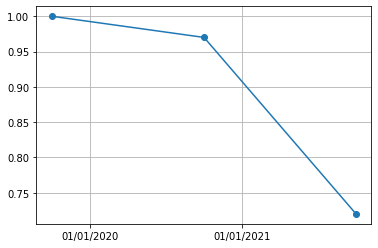

In [13]:
# import modules and objects that we need
from datetime import date
import numpy, math
from matplotlib import pyplot as plt
import matplotlib.dates as mdates 
# with this notation we tell python to use mdates as an alias 
# for matplotlib.dates, I told you I'm lazy...

# define the input data
today_date = date(2019, 10, 1)

pillar_dates = [date(2019, 10, 1), date(2020, 10, 1), date(2021, 10, 1)]
discount_factors = [1.0, 0.97, 0.72]

# let's see what this looks like when plotted on a graph
# here a more complicated usage of matplotlib to
# get a nicer plot
plt.plot(pillar_dates, discount_factors, marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

# define the df function
def df(d):
    # first thing we need to do is to apply the logarithm function 
    # to the discount factors since we are doing log‐linear and
    # not just linear interpolation
    log_discount_factors = []
    for discount_factor in discount_factors:
        log_discount_factors.append(math.log(discount_factor))
    
    # perform the linear interpolation of the log discount factors
    interpolated_log_discount_factor = \
        numpy.interp(d, pillar_dates, log_discount_factors)
    
    # return the interpolated discount factor
    return math.exp(interpolated_log_discount_factor)

This is almost OK, **but it won't work** because ```numpy.interp``` only accepts numbers/lists of numbers as arguments i.e. it doesn't automatically convert or interpret dates as numbers in any way, so it doesn't know how to interpolate them.
So we need to do the conversion ourselves before passing the data into the ```numpy.interp``` function.

In [7]:
def df(d):
    # first thing we need to do is to apply the logarithm function
    # to the discount factors since we are doing log‐linear and
    # not just linear interpolation
    log_discount_factors = []
    for discount_factor in discount_factors:
        log_discount_factors.append(math.log(discount_factor))
    
    # convert the pillar dates to pillar 'days'
    # i.e. number of days from today
    # to write shorter code we can use this NEW notation
    # which condenses for and list creation in one line
    pillar_days = \
        [(pillar_date - today_date).days for pillar_date in pillar_dates]
    
    # obviously we need to do the same to the value date
    # argument of the df function
    d_days = (d - today_date).days
    
    # perform the linear interpolation of the log discount factors
    interpolated_log_discount_factor = \
        numpy.interp(d_days, pillar_days, log_discount_factors)
    
    # return the interpolated discount factor
    return math.exp(interpolated_log_discount_factor)

In [8]:
# now we can use the df function to get discount factors
# on value dates between the given pillar dates
d0 = date(2020, 1, 1)
df0 = df(d0)
print (df0)

0.9923728228571693


In [9]:
d1 = date(2021, 1, 1)
df1 = df(d1)
print (df1)

0.8997999273630835


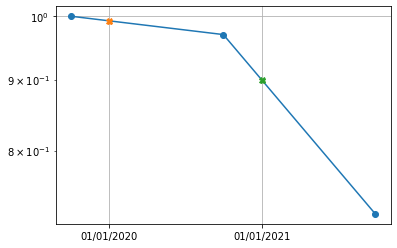

In [10]:
# let's see what these look like when plotted on a semi‐log graph

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

plt.semilogy(pillar_dates, discount_factors, marker='o')
plt.semilogy(d0,df0 , marker='X')
plt.semilogy(d1,df1 , marker='X')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

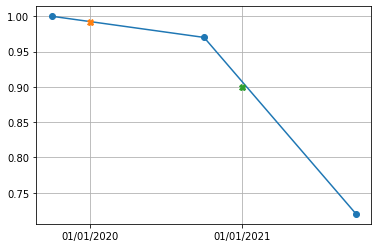

In [11]:
# let's see what these look like when plotted on a linear graph

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
plt.plot(pillar_dates, discount_factors, marker='o')
plt.plot(d0,df0 , marker='X')
plt.plot(d1,df1 , marker='X')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

## Exercises

### Exercise 3.1

Take the code for the Black-Scholes formula from Exercise 2.3 and wrap it in a function.
Then, use this function to calculate the prices of calls with various strikes, using the following data.

```python
S_t = 800
# strikes expressed as % of spot price
moneyness = [ 0.5, 0.75, 0.825, 1.0, 1.125, 1.25, 1.5 ]   
vol = 0.3
ttm = 0.75
r = 0.005
```
The output should be a dictionary mapping strikes to call prices.

### Exercise 3.2

Python has a useful command called `assert` which can be used for checking that a given
condition is satisfied, and raising an error if the condition is not satisfied.

The following line does not cause an error, in fact it does nothing
```python 
assert 1 < 2
```

This causes an error
```python
assert 1 > 2
```

`assert` can take a second argument with a message to display in case of failure.
```python
assert 1 > 2, "Two is bigger than one"
```

Take the  `df` function from this lesson and modify it by adding some assertions to check that:

* the pillar date list contains at least 2 elements;
* the pillar date list is the same length as the discount factor list;
* the first pillar date is equal to the today date;
* the value date argument 'd' is greater or equal to the first pillar date and also less than or equal to the last pillar date.

Then try using the function with some invalid data to make sure that your assertions are correctly checking the desired conditions.

### Exercise 3.3

Python has a module called ```matplotlib``` which can be used for plotting graphs and charts. In particular, we can use a sub-module called ```pyplot``` which provides slightly easier-to-use interface for plotting interactively.

```python
from matplotlib import pyplot

# plot some data
pyplot.plot(
    [1, 2, 3],   # x-axis coordinates
    [5, 3, 10],  # y-axis coordinates
    marker='o'   # we want the points to be marked with circles
)
```

Use this function to plot the call prices from exercise 3.1.
Remember to use ```help``` and ```dir``` to have some help (or to look in Google ;-)).